# Практикум по лекции 1 "Введение в математическую статистику"

## Рецепты для быстрого решения задач

**1. Как выбрать и распознать распределение?**  
- Число успехов в фиксированном числе независимых испытаний -> биномиальное.  
- Время между событиями -> экспоненциальное/гамма.  
- Число событий в интервале -> пуассон.  
- Сумма большого числа независимых вкладов -> применяем ЦПТ (нормальное приближение).

**2. Предельные теоремы**  
- Закон больших чисел: среднее сходится к математическому ожиданию.  
- Центральная предельная теорема: стандартизируйте сумму/среднее и используйте $N(0,1)$.  
- Поправка на непрерывность при переходе от дискретного к нормальному (бином/пуассон).

**3. Стандартизация**  
- Для суммы $S_n$: $$Z=\frac{(S_n - E[S_n])}{\sqrt{Var(S_n)}}$$. 
- Для среднего: $$Z=\frac{\bar X - \mu}{\sigma/\sqrt{n}}$$.

### Задача 1

**Условие.** В урне 5 белых и 7 чёрных шаров. Достанут 3 шара без возвращения. Какова вероятность, что ровно 2 белых?

**Рецепт:** дискретная модель без возвращения -> гипергеометрическое распределение.

$$P(X = k) = \frac{\binom{K}{k} \, \binom{N - K}{n - k}}{\binom{N}{n}}$$

**Решение:**
- Число способов выбрать 2 белых из 5: `C(5,2)`.
- Выбрать 1 чёрный из 7: `C(7,1)`.
- Всего способов выбрать 3 из 12: `C(12,3)`.
- Вероятность = `C(5,2)*C(7,1)/C(12,3)`.

$$
P=\dfrac{\binom{5}{2}\,\binom{7}{1}}{\binom{12}{3}}=\dfrac{7}{22}\approx0.31818.
$$


In [30]:
from math import comb
from scipy.stats import hypergeom

In [33]:
(comb(5, 2) * comb(7, 1)) / comb(12, 3)

0.3181818181818182

In [41]:
# help(hypergeom)

In [31]:
# параметры
N = 12  # всего шаров
K = 5   # белых
n = 3   # достаём
k = 2   # интересует ровно 2 белых
hypergeom.pmf(k, N, K, n)

0.31818181818181823


### Задача 2 

**Условие.** Модель проходит 20 независимых теста, вероятность успеха в каждом - 0.2. Найти вероятность ровно 5 успешных тестов `P(X=5)` и математическое ожидание числа успехов `E[X]`.

**Рецепт:** бинарные испытания -> `Bin(n,p)`, `E[X]=n*p`.

**Решение:**

$$P(X=5)=\binom{20}{5}0.2^5 0.8^{15},\quad E[X]=20\cdot0.2=4.$$


In [42]:
from scipy.stats import binom

In [52]:
help(binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.
    
    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inve

In [50]:
s = 0
for i in range(5, 21):
    s += binom.pmf(i, 20, 0.2)
s

0.3703517360973315

In [47]:
p = binom.pmf(5, 20, 0.2)
m = binom.mean(20, 0.2)
p, m

(0.17455952155688056, 4.0)

### Задача 3

**Условие.** Вероятность успеха `p=0.3`. Какова вероятность, что до третьего успеха потребуется ровно 8 испытаний? Найти `P(первый успех на 4-м)` и `P(третий успех на 8-м)`.

**Рецепт:** первый успех на k-м -> геометрическое: $P(K=k)=(1-p)^{(k-1)}p$. 

Для r-го успеха используется отрицательное биномиальное:

$$P(X = k) = \binom{k - 1}{r - 1} p^{r} (1 - p)^{k - r}, \quad k = r, r + 1, \ldots$$

**Решение:**

Первый успех: $P=(1-p)^3 p$. 

Третий на 8-м: $P=\binom{7}{2} p^3 (1-p)^5$.


In [5]:
from scipy.stats import nbinom

### Задача 4 

**Условие.** В минуту в среднем 2 события. Какова вероятность, что за 3 минуты произойдёт ровно 5 событий? Параметр $\lambda=2\cdot3=6$. Найти `P(X=5)`.

**Решение:** $lambda=2*3=6,$ $$P(X=5)=\frac{exp(-6)*6^5}{5!}$$


In [7]:
from scipy.stats import poisson

In [53]:
# help(poisson)

In [54]:
poisson.pmf(5, 6)

0.16062314104797995

*PS: при большом lambda можно приближать нормальным: N(lambda, lambda).*

### Задача 5

**Условие.** Время между событиями экспоненциально с параметром `lambda=0.5` (мин). Какова вероятность, что интервал превысит 3 минуты? Какова медиана?

**Рецепт:** `P(X>t)=exp(-lambda*t)`. Медиана m: `exp(-lambda*m)=0.5` -> `m=ln(2)/lambda`.


**Решение:** $P(X>3)=e^{-1.5},\ m=\ln 2/0.5$.


In [58]:
from scipy.stats import expon

In [60]:
# help(expon)

In [9]:
import math

In [62]:
lam = 0.5
p = math.exp(-lam * 3)
med = math.log(2) / lam
p, med

(0.22313016014842982, 1.3862943611198906)

### Задача 6

**Условие.** Если интервалы между событиями IID Exp(lambda), показать, что число событий в `[0,T]` имеет `Poisson(lambda*T)`. Обосновать, что с IID Exp(lambda) число событий в `[0,T] ~ Pois(lambda*T)`.

**Рецепт:** сумма k экспоненциальных распределений дает гамма-распределение; вероятность ровно k событий до T равна $P(S_k <= T < S_{k+1})$, где $S_k\sim Gamma(k, lambda)$.

**Решение:** Через свойства суммы экспоненциальных (гамма) и разности распределений: 

$$P(N(T)=k)=\frac{e^{-λT}(λT)^k}{k!}.$$

PS: IID - Independent and Identically Distributed

In [63]:
import numpy as np

In [73]:
np.random.exponential(1/lam)

0.5222596937953704

In [75]:
counts[0:10]

array([11,  8,  3,  7,  6,  2,  8, 10,  5,  7])

In [78]:
# help(np.bincount)

In [64]:
np.random.seed(1)
lam = 2.0
T = 3.0
ntrials = 200000

# simulate Poisson via exponential interarrivals
counts = np.zeros(ntrials, dtype=int)
# print(counts)
for i in range(ntrials):
    s=0.0
    cnt=0
    while s < T:
        s += np.random.exponential(1/lam)
        if s <= T:
            cnt += 1
    counts[i] = cnt
np.bincount(counts)[:10]/ntrials  # empirical pmf for small k

[0 0 0 ... 0 0 0]


array([0.002685, 0.01452 , 0.044545, 0.089365, 0.134   , 0.15954 ,
       0.161165, 0.13794 , 0.103865, 0.06821 ])

In [81]:
import matplotlib.pyplot as plt

(array([5.3700e+02, 2.9040e+03, 8.9090e+03, 1.7873e+04, 2.6800e+04,
        3.1908e+04, 3.2233e+04, 2.7588e+04, 2.0773e+04, 1.3642e+04,
        8.3250e+03, 4.5680e+03, 2.1320e+03, 1.0430e+03, 4.5900e+02,
        1.9100e+02, 7.3000e+01, 3.0000e+01, 9.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <BarContainer object of 22 artists>)

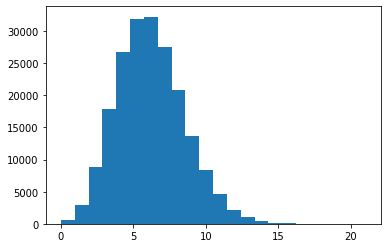

In [83]:
plt.hist(counts, bins=22)

### Задача 7

**Условие.** `X~Pois(l1)`, `Y~Pois(l2)`. Найти распределение `X+Y`.

**Рецепт:** сумма независимых `Poisson -> Poisson(lambda1+lambda2)`.

**Решение:** $X+Y \sim Pois(l1+l2)$.


In [84]:
import numpy as np

In [91]:
# help(poisson)

In [99]:
l1, l2 = 2, 3
sample1 = poisson.rvs(l1, size=10000)
sample2 = poisson.rvs(l2, size=10000)
sample_12 = sample1 + sample2

np.mean(sample_12), l1 + l2

(5.0158, 5)

In [100]:
sample1.shape

(10000,)

### Задача 8

**Условие.** Для $X \sim N(mu, sigma^2)$ показать, что медиана = мода = матожидание и найти $P(|X-mu| <= 2 sigma)$.

**Решение:** симметрия вокруг mu -> равенство; $P = 2*Phi(2)-1 \approx 0.9545$.


In [17]:
from scipy.stats import norm

### Задача 9

**Условие.** $X_1..X_n$ IID, $E=\mu$, $Var=sigma^2$. Показать стандартизацию $S_n$ для применения CLT.

**Решение:** $$Z = \frac{S_n - n\mu}{\sigma sqrt(n)}.$$

In [18]:
import numpy as np

In [19]:
# демонстрация: стандартизация случайной выборк
np.random.seed(0)
X = np.random.normal(loc=5, scale=3, size=1000)
S = X[:100].sum()

mu = 5 * 100
sigma = 3 * (100**0.5)
(S - mu) / sigma

0.5980801553448525

### Задача 10

**Условие.** Есть распределение с $E=5$, $Var=9$. Для $n=100$ найти $P(barX > 5.5)$. Используем ЦПТ.

**Решение:** 

$SE=0.3,$ 

$z=(5.5-5)/0.3\approx 1.6667,$ 

$P\approx 1-Φ(1.6667)\approx0.0478$.$

PS: Ф - функция распределения стандартного нормального закона,

### Задача 11

**Условие.** $Bin(n=200, p=0.4)$. Найти $P(X >= 90)$ с поправкой 0.5 (Муавр-Лаплас).

**Решение:** приближать N(80, 48), применить 89.5 в качестве порога.

$\mu=80, \sigma=\sqrt{48}$, порог 89.5, $z\approx 1.3712,$ $P\approx0.0852$.


In [21]:
import math
from scipy.stats import norm

### Задача 12 

**Условие.** $X_i$ IID с $E=10$ (например, $Exp(1/10)$). Покажите на симуляции сходимость средних.

**Решение:** $Var(barX)=\sigma^2/n -> 0$, Чебышёв -> сходимость.


In [24]:
import numpy as np

In [23]:
np.random.seed(1)
def simulate_last_mean(n):
    x = np.random.exponential(scale=10, size=n)
    return x.cumsum()[-1]/n
for n in [10,100,1000,10000]:
    print(n, simulate_last_mean(n))

10 4.33895512579412
100 10.737488893608269
1000 9.921202445283294
10000 9.88176298490699


### Задача 13

**Условие.** Редкие события - пуассоновская аппроксимация, $n=5000$, $p=0.001$. Найти $P(X=3)$ приближенно.

**Решение:** $λ=5$, $$P\approx e^{-5}5^3/3!\approx0.14037.$$


In [25]:
from scipy.stats import poisson

### Задача 14 

**Условие.** Оценить $P(|barX - 0.6| >= 0.05)$ через Чебышёва для $n=100$ и $n=1000$.

**Решение:** $$bound = \frac{p(1-p)}{(n*ε^2)} = \frac{0.24}{(n*0.0025)} = \frac{96}{n}.$$


### Задача 15

**Условие.** Смоделировать средние из экспоненциального распределения для $n=5,30,100$ и сравнить эмпирические распределения с нормальным (ЦПТ).

**Решение:** $Var(mean)=σ^2/n$ -> уменьшается.


In [28]:
import numpy as np

In [29]:
np.random.seed(0)
def stats_means(n):
    samples = np.random.exponential(scale=1, size=(10000,n))
    means = samples.mean(axis=1)
    return means.mean(), means.std()

for n in [5,30,100]:
    print(n, stats_means(n))

5 (0.9945234209742982, 0.4446210434925225)
30 (1.0002657402778432, 0.18235051217216974)
100 (1.0010743666442343, 0.09992251023001385)
